In [1]:
#인공지능이 문장을 듣고 이해한다는 것은 많은 문장을 이미 학습해 놓았다는 것이다
#그런데 문장을 학습하는 것은 우리가 지금까지 공부한 내용과는 성질이 다르다
#문장은 여러 개의 단어로 이루어져 있는데, 그 의미를 전달하려면 각 단어가 정해진 순서대로 입력되어야 하기 때문이다
#과거에 입력된 데이터와 나중에 입력된 데이터 사이의 관계를 고려해야 하는 문제가 발생

In [2]:
#이를 해결하기 위해 '순환 신경망(Recurrent Neural Network, RNN)'방법이 고안되었다
#순환 신경망은 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법이다
#그리고 기억된 데이터가 얼마나 중요한지를 판단하여 별도의 가중치를 줘서 다음 데이터로 넘어간다
#모든 입력 값에 이 작업을 순서대로 실행하므로 다음 층으로 넘어가기 전에 같은 층을 맴도는 것처럼 보인다
#이렇게 같은 층 안에서 맴도는 성질 때문에 순환 신경망이라고 부른다

In [3]:
#앞서 나온 입력에 대한 결과가 뒤에 나오는 입력값에 영향을 주어야 한다
#그래야지만 비슷한 두 문장이 입력되었을 때 그 차이를 구별하여 출력 값에 반영할 수 있다
#예를 들어 오늘 주가를 묻는 경우는 오늘을 기준으로 계산되어야 하고 
#어제 주가를 묻는 경우는 어제를 기준으로 계산되어야 한다

In [5]:
#RNN이 개발된 이후, RNN의 결과를 더욱 개선하기 위한 노력이 계속되어왔다
#이 중에서 'LSTM(Long Short Term Memory)'방법을 함께 사용하는 기법이 현재 가장 널리 사용되고 있다
#LSTM은 한 층 안에서 반복을 많이 해야하는 RNN의 특성상 일반 신경망보다 기울기 소실 문제가 더 많이 발생하고 
#이를 해결하기 어렵다는 단점을 보완한 방법이다
#즉, 반복되기 직전에 다음 층으로 기억된 값을 넘길지를 관리하는 단계를 하나 더 추가하는 것이다

In [6]:
#RNN방식의 장점은 입력 값과 출력 값을 어떻게 설정하느냐에 따라 다음과 같은 여러가지 상황에서 이를 적용할 수 있다
#1. 다수 입력 단일 출력 : 문장을 읽고 뜻을 파악할 때 활용
#2. 단일 입력 다수 출력 : 사진의 캡션을 만들 때 활용
#3. 다수 입력 다수 출력 : 문장을 변역할 때 활용

### LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [9]:
#입력된 문장의 의미를 파악하는 것은 곧 모든 단어를 종합하여 하나의 카테고리로 분류하는 작업이라고 할 수 있다
#예를 들어 '안녕, 오늘 날씨가 참 좋네'라는 말은 '인사'카테고리에 분류해야 한다

In [10]:
#중부 지방은 대체로 맑겠으나, 남부 지방은 구름이 많겠습니다 -> 날씨
#올 초부터 유동성의 힘으로 주가가 일정하게 상승했습니다 -> 주식
#이번 선거에서는 누가 이길 것 같아? -> 정치
#퍼셉트론의 한계를 극복한 신경망이 다시 뜨고 있대 -> 딥러닝

In [11]:
#이번에 실습할 내용은 이처럼 긴 텍스트를 읽고 이 데이터가 어떤 의미를 지니는지를 카테고리로 분류하는 연습
#실습을 위해 로이터 뉴스 데이터를 사용하겠다. 총 11,258개의 뉴스 기사가 46개의 카테고리로 나누어진 대용량 텍스트 데이터
#데이터는 케라스를 통해 불러올 수 있다

In [12]:
from keras.datasets import reuters

In [13]:
#불러온 데이터를 학습셋과 테스트셋으로 나눈다

In [14]:
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 1s 0us/step


C:\Users\name_\.conda\envs\learning\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\name_\.conda\envs\learning\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [15]:
#reuters.load_data() 함수를 이용해 기사를 불러왔다
#test_split 인자를 통해 20%를 테스트셋으로 사용했다
#num_words라는 인자는 무엇을 의미하는지 알아보고자 먼저 불러온 데이터에 대해 몇 가지를 출력해 보겠다

In [16]:
import numpy
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [17]:
#numpy.max() 함수로 Y_train의 종류를 구하니 46개의 카테고리로 구분되어 있음을 확인 (0부터 세기 때문에 1을 더해준다)
#이 중 8,982는 학습용으로 2,246은 테스트용으로 준비되어 있다
#그런데 print(X_train[0])으로 기사를 출력해 보니 단어가 나오는 게 아니라 숫자가 나오는 것을 확인할 수 있다
#딥러닝은 단어를 그대로 사용하지 않고 숫자로 변환한 다음 학습할 수 있다
#여기서는 데이터 안에서 해당 단어가 몇 번이나 나타나는지 세어 빈도에 따라 번호를 붙였다
#예를 들어 3이라고 하면 3번째로 빈도가 높은 단어라는 것이다
#이러한 작업을 위해서 tokenizer() 같은 함수를 사용하는데, 케라스는 이 작업을 이미 마친 데이터를 불러올 수 있다

In [18]:
#기사 안의 단어 중에는 거의 사용되지 않는 것들도 있다 모든 단어를 사용하는 것은 비효율적이므로 빈도가 높은 단어만 불러와 사용하자
#이때 사용하는 인자가 바로 테스트셋과 학습셋으로 나눌 때 함께 적용했던 num_word=1000의 의미이다
#빈도가 1~1000에 해당하는 단어만 선택해서 불러오는 것이다

In [19]:
#또 하나 주의해야 할 점은 각 기사의 단어 수가 제각각 다르므로 이를 동일하게 맞춰야 한다는 것이다
#이때는 다음과 같이 데이터 전처리 함수 sequence()를 이용한다

In [20]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

In [21]:
#maxlen=100은 단어 수를 100개로 맞추라는 뜻이다. 만일 입력된 기사의 단어 수가 100보다 크면 100개째 단어만 선택하고 나머지는 버린다
#100에서 모자를 때는 모자라는 부분을 모두 0으로 채운다
#이제 y데이터에 원-핫 인코딩을 처리하여 데이터 전처리 과정을 마친다

In [22]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [25]:
#딥러닝 구조를 만들자

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [27]:
#Embedding층과 LSTM층이 새로 추가된 것이 보인다
#Embedding층은 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환한다
#Embedding(불러온 단어의 총 개수, 기사당 단어 수) 형식으로 사용하며, 모델 설정 부분의 맨 처음에 있어야 한다

In [28]:
#LSTM은 앞서 설명했듯이 RNN에서 기억 값에 대한 가중치를 제어하며, LSTM(기사당 단어 수, 기타 옵션) 형식으로 사용
#LSTM의 활성화함수는 tanh를 사용한다

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))
print('\n Accuracy: %.4f' %(model.evaluate(x_test,y_test)[1]))

Epoch 1/20
90/90 [==============================] - 14s 152ms/step - loss: 2.5988 - accuracy: 0.3475 - val_loss: 2.3876 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 13s 150ms/step - loss: 2.0856 - accuracy: 0.4591 - val_loss: 1.9246 - val_accuracy: 0.4960
Epoch 3/20
90/90 [==============================] - 12s 136ms/step - loss: 1.7983 - accuracy: 0.5422 - val_loss: 1.8179 - val_accuracy: 0.5392
Epoch 4/20
90/90 [==============================] - 12s 138ms/step - loss: 1.7010 - accuracy: 0.5667 - val_loss: 1.7685 - val_accuracy: 0.5815
Epoch 5/20
90/90 [==============================] - 12s 137ms/step - loss: 1.6492 - accuracy: 0.5847 - val_loss: 1.6625 - val_accuracy: 0.5819
Epoch 6/20
90/90 [==============================] - 12s 137ms/step - loss: 1.5610 - accuracy: 0.6070 - val_loss: 1.6612 - val_accuracy: 0.5895
Epoch 7/20
90/90 [==============================] - 12s 136ms/step - loss: 1.4830 - accuracy: 0.6206 - val_loss: 1.5407 - val_accuracy: 0.6198

#### - 코드정리

In [30]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [31]:
#seed값 설정
seed = 0
np.random.seed(3)
tf.random.set_seed(3)

In [34]:
#불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

C:\Users\name_\.conda\envs\learning\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\name_\.conda\envs\learning\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [35]:
#데이터 확인하기
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [36]:
#데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [37]:
#모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [38]:
#모델의 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=100, validation_data=(x_test,y_test))
print('\n Accuracy : %.4f' %(model.evaluate(x_test,y_test)[1]))

Epoch 1/20
90/90 [==============================] - 13s 144ms/step - loss: 2.5777 - accuracy: 0.3497 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 12s 135ms/step - loss: 2.0351 - accuracy: 0.4904 - val_loss: 1.9314 - val_accuracy: 0.5062
Epoch 3/20
90/90 [==============================] - 12s 137ms/step - loss: 1.8896 - accuracy: 0.5153 - val_loss: 1.8188 - val_accuracy: 0.5227
Epoch 4/20
90/90 [==============================] - 13s 144ms/step - loss: 1.7248 - accuracy: 0.5533 - val_loss: 1.7089 - val_accuracy: 0.5588
Epoch 5/20
90/90 [==============================] - 13s 142ms/step - loss: 1.6690 - accuracy: 0.5749 - val_loss: 1.7092 - val_accuracy: 0.5735
Epoch 6/20
90/90 [==============================] - 13s 143ms/step - loss: 1.6266 - accuracy: 0.5853 - val_loss: 1.6125 - val_accuracy: 0.6051
Epoch 7/20
90/90 [==============================] - 13s 143ms/step - loss: 1.4977 - accuracy: 0.6204 - val_loss: 1.5190 - val_accuracy: 0.6327

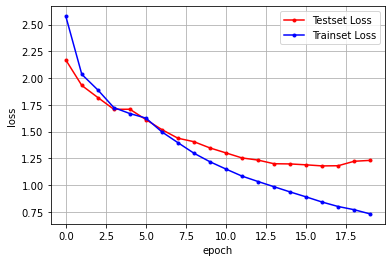

In [41]:
#테스트셋오차
y_vloss = history.history['val_loss']
#학습셋오차
y_loss = history.history['loss']
#그래프로 표현
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset Loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset Loss')
#그래프에 그리드 추가하고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [42]:
#테스트셋에 대한 정확도가 71.02%를 보이고 있다
#테스트 오차가 상승하기 전까지의 학습이 과적합 직전의 최적 학습 시간이다

### LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [43]:
#이번에 사용할 인터넷 영화 데이터베이스는 영화와 관련된 정보와 출연진 정보, 개봉 정보, 영화 후기, 평점에 이르기까지
#매우 폭 넓은 데이터가 저장된 자료이다
#영화에 관해 남긴 2만 5000여개의 영화리뷰가 담겨져 있으며, 해당영화를 긍정적으로 평가했는지 부정적으로 평가했는지도 담겨있다
#앞서 다루었던 로이터 뉴스 데이터와 마찬가지로 각 단어에 대한 전처리를 마친 상태이다
#데이터셋에서 나타나는 빈도에 따라 번호가 정해지므로 빈도가 높은 데이터를 불러와 학습시킬 수 있다
#클래스가 긍정 또는 부정 2가지 뿐이라 원-핫 인코딩 과정이 필요없다

In [45]:
#데이터 불러오기
from keras.datasets import imdb

In [46]:
#학습셋과 테스트셋 지정하기
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 2s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\name_\.conda\envs\learning\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\name_\.conda\envs\learning\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

In [47]:
#데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

In [48]:
#모델 설정 마지막에 model.summary()함수를 넣으면 현재 설정된 모델의 구조를 한눈에 볼 수 있다

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM, Conv1D, MaxPooling1D, Activation

model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                

In [52]:
#Conv1D는 Conv2D 개념을 1차원으로 옮긴것이다
#컨볼루션 층이 1차원이고 이동하는 배열(mask)도 1차원이다
#마스크가 1칸씩 지나가면서(strides=1) 원래의 1차원 배열에 가중치를 각각 곱하여 새로운 층인 컨볼루션 층을 만든다
#MaxPooling1D도 마찬가지로 2차원 배열이 1차원으로 바뀐것이고, 정해진 구역에서 가장 큰 값을 다음 층으로 넘기고 나머지는 버린다

#### - 코드정리

In [53]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Conv1D, LSTM, MaxPooling1D, Activation
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [54]:
#seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [55]:
#학습셋과 테스트셋 분류
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=5000)

In [58]:
#데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

In [61]:
#모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [65]:
#모델의 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, Y_train, epochs=5, batch_size=100, validation_data=(x_test,Y_test))
print('\n Accuracy:%.4f' %(model.evaluate(x_test,Y_test)[1]))

Epoch 1/5
250/250 [==============================] - 22s 89ms/step - loss: 0.0343 - accuracy: 0.9900 - val_loss: 0.6304 - val_accuracy: 0.8418
Epoch 2/5
250/250 [==============================] - 22s 86ms/step - loss: 0.0414 - accuracy: 0.9862 - val_loss: 0.5866 - val_accuracy: 0.8443
Epoch 3/5
250/250 [==============================] - 21s 85ms/step - loss: 0.0599 - accuracy: 0.9797 - val_loss: 0.5919 - val_accuracy: 0.8356
Epoch 4/5
250/250 [==============================] - 21s 84ms/step - loss: 0.0439 - accuracy: 0.9856 - val_loss: 0.5749 - val_accuracy: 0.8382
Epoch 5/5
782/782 [==============================] - 5s 7ms/step - loss: 0.6019 - accuracy: 0.8390

 Accuracy:0.8390


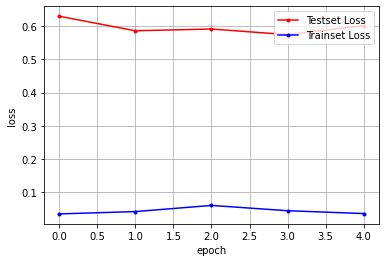

In [67]:
#테스트셋 오차
y_vloss = history.history['val_loss']
#학습셋오차
y_loss = history.history['loss']
#그래프로 표현

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset Loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset Loss')
#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()